<a href="https://colab.research.google.com/github/namanmodani/acm-ai-beginner/blob/main/knn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACM AI Beginner Track
## Workshop 2: KNN Demo

In [ ]:
# import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
# load iris dataset with load_iris
iris_data = load_iris()

In [ ]:
# documentation
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# feature names
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# target names
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
# assign the features to X and the targets to y 
X = iris_data.data
y = iris_data.target

In [ ]:
# split train and test data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=24)

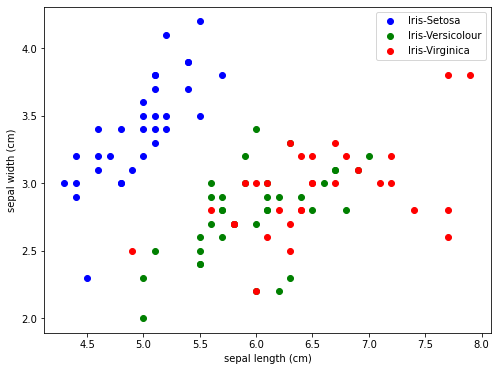

In [ ]:
# plot train data
y0 = (y_train == 0)
y1 = (y_train == 1)
y2 = (y_train == 2)

# visualize the first 2 features
plt.figure(figsize=[8, 6])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(X_train[y0, 0], X_train[y0, 1], c='b', label='Iris-Setosa')
plt.scatter(X_train[y1, 0], X_train[y1, 1], c='g', label='Iris-Versicolour')
plt.scatter(X_train[y2, 0], X_train[y2, 1], c='r', label='Iris-Virginica')
plt.legend()

In [ ]:
# create a KNN model
knn = KNeighborsClassifier()  # default value of k is 5

In [ ]:
# fit the KNN model to the train data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# make predictions on the test data
y_pred = knn.predict(X_test)

In [ ]:
# accuracy of the KNN model
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.98


In [ ]:
# Can you find the best k(s) for this dataset?
accuracies = []

for k in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  accuracies.append(knn.score(X_test, y_test))

print('Best k:', np.argmax(accuracies) + 1)

Best k: 8


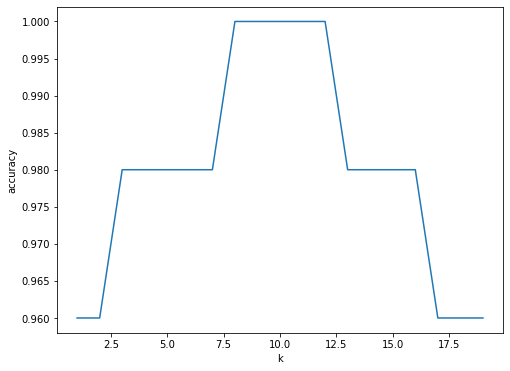

In [ ]:
# plot k vs accuracy
plt.figure(figsize=[8, 6])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(np.arange(1, 20), accuracies)

Turns out the best k is around the range of 10, which is the square root of the size of the train data. You can verify that by checking the value of `X_train.shape[0]`

In [ ]:
X_train.shape[0]

100